In [1]:
%pip install -q yfinance pandas matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta

In [5]:
class Stock:
    def __init__(self, symbol, start=None, end=None):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = None

    def get_data(self):
        if self.start is None or self.end is None:
            today = date.today()
            one_year_ago = today - timedelta(days=365)
            self.start = one_year_ago.isoformat()
            self.end = today.isoformat()

        df = yf.download(self.symbol, start=self.start, end=self.end, progress=False)

        df = df[['Close']].copy()
        df.rename(columns={'Close': 'close'}, inplace=True)
        df.index = pd.to_datetime(df.index)

        self.data = df
        self.calc_returns()
        return self.data

    def calc_returns(self):
        self.data['change'] = self.data['close'].diff()
        self.data['instant_return'] = np.log(self.data['close']).diff().round(4)
        self.data['cum_pct_gain'] = (self.data['close'] / self.data['close'].iloc[0] - 1) * 100

    def plot_return_dist(self):
        plt.hist(self.data['instant_return'].dropna(), bins=40, edgecolor='black')
        plt.title(f"{self.symbol} - Histogram of Daily Returns")
        plt.xlabel("Instantaneous Return (log diff)")
        plt.ylabel("Frequency")
        plt.grid(True, alpha=0.3)
        plt.show()

    def plot_performance(self):
        self.data['cum_pct_gain'].plot(figsize=(8,5))
        plt.title(f"{self.symbol} - Performance (% gain/loss from start)")
        plt.xlabel("Date")
        plt.ylabel("Percent Gain/Loss")
        plt.grid(True, alpha=0.3)
        plt.show()

In [7]:
# Test your class
# 1. instantiate a test object
stk = Stock("AAPL")  # change the ticker if you want

# 2. access the data attribute
df = stk.get_data()
df.head()

/var/folders/89/0lgpfqnd7qx0q_w_xzbcdm5w0000gn/T/ipykernel_16819/3285044598.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.symbol, start=self.start, end=self.end, progress=False)


Price,close,change,instant_return,cum_pct_gain
Ticker,AAPL,,,
Date,,,,
2024-10-07,220.663040,NaN,NaN,0.000000
2024-10-08,224.724136,4.061096,0.0182,1.840406
2024-10-09,228.476654,3.752518,0.0166,3.540971
2024-10-10,227.978973,-0.497681,-0.0022,3.315432
2024-10-11,226.495880,-1.483093,-0.0065,2.643324


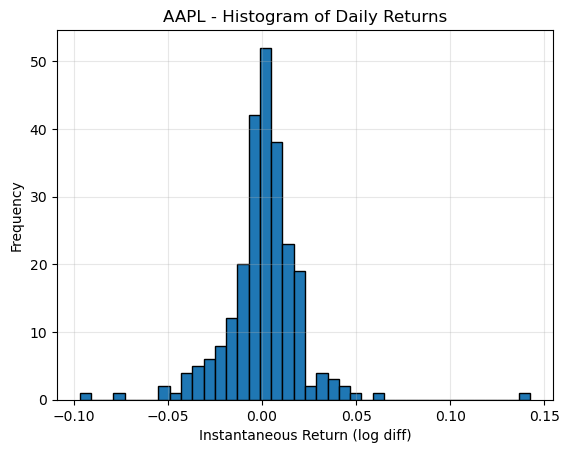

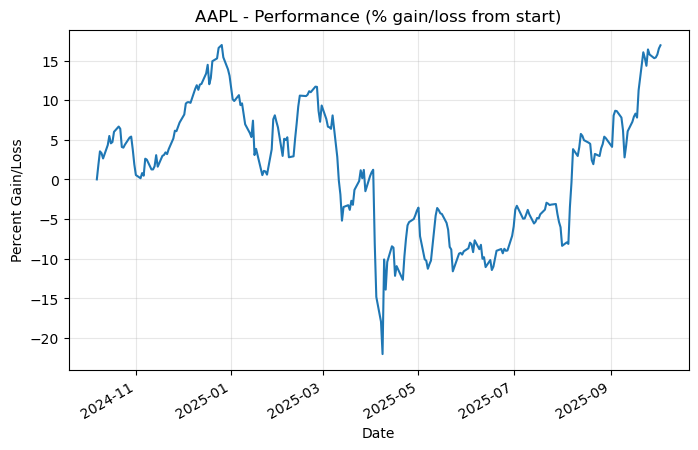

In [9]:
# 3. generate the two plots
stk.plot_return_dist()
stk.plot_performance()